# Featurizer
Generates some features to use for normalizing the times in the race results, controlling for age and sex.


In [10]:
import pandas as pd

RACE_DATA = "../data/featurized_race_data_v2.csv"
race_df = pd.read_csv(RACE_DATA)

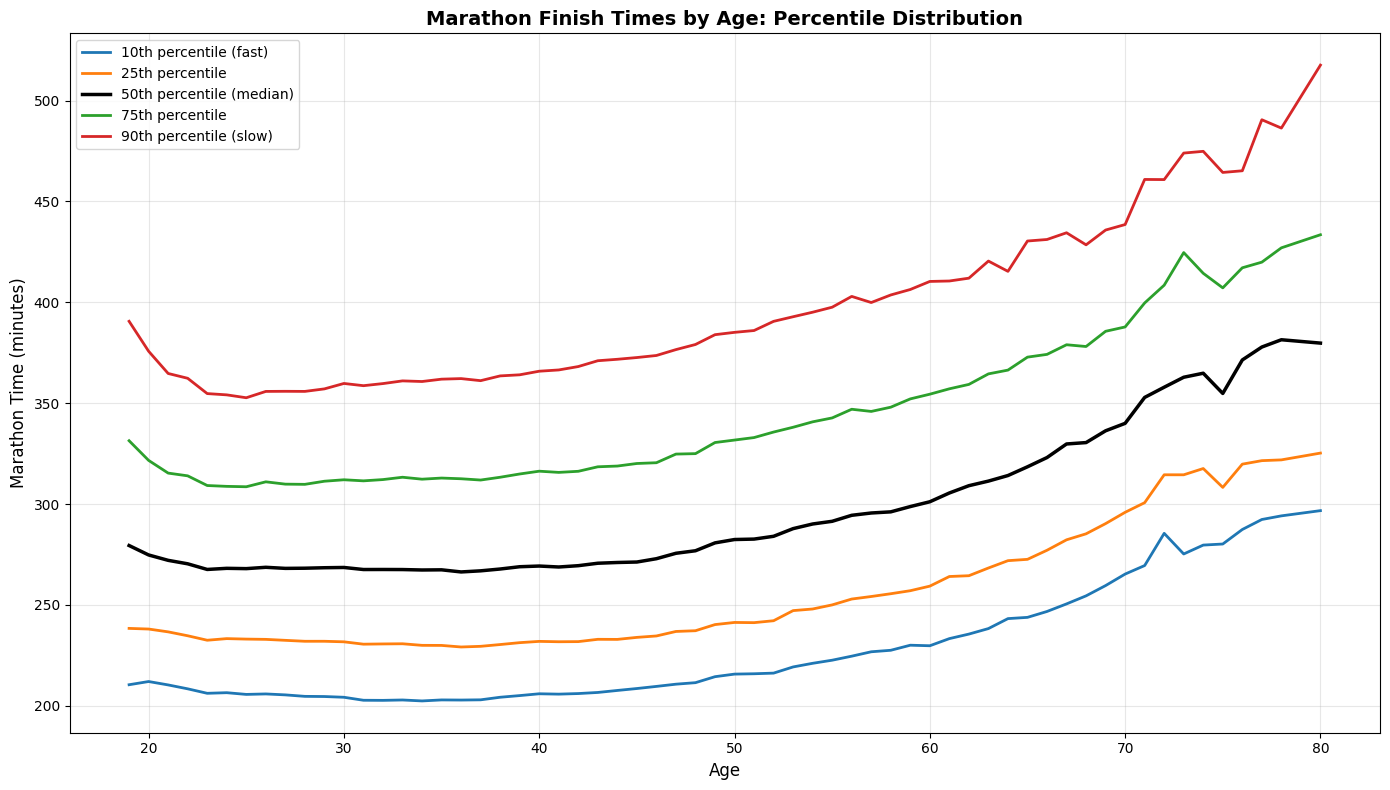

Age-based percentile statistics:


,age,count,10th_percentile,25th_percentile,50th_percentile,75th_percentile,90th_percentile,mean
0,19.0,5378,210.446667,238.370833,279.441667,331.383333,390.581667,292.071461
1,20.0,8241,212.033333,238.050000,274.766667,321.633333,375.733333,286.191334
2,21.0,11638,210.350000,236.650000,272.100000,315.341667,364.716667,282.049804
3,22.0,16921,208.416667,234.716667,270.383333,313.983333,362.333333,279.439264
4,23.0,29741,206.200000,232.500000,267.583333,309.183333,354.750000,275.319931
5,24.0,40804,206.500000,233.300000,268.141667,308.766667,354.116667,275.252349
6,25.0,48620,205.650000,233.066667,267.991667,308.570833,352.685000,274.760334
7,26.0,53996,205.883333,232.929167,268.650000,311.016667,355.825000,275.830451
8,27.0,55843,205.416667,232.450000,268.116667,309.866667,355.880000,275.370972
9,28.0,56891,204.683333,231.983333,268.200000,309.766667,355.833333,275.227458


In [11]:
# Group by age, get percentiles, and plot
import matplotlib.pyplot as plt
import numpy as np

# Filter to valid ages and times
df_valid = race_df[(race_df['age'].notna()) & (race_df['age'] > 18) & (race_df['time'].notna()) & (race_df['age'] > 0) & (race_df['age'] < 100)]

# Group by age and calculate percentiles
age_stats = df_valid.groupby('age')['time'].agg([
    ('count', 'count'),
    ('10th_percentile', lambda x: np.percentile(x, 10)),
    ('25th_percentile', lambda x: np.percentile(x, 25)),
    ('50th_percentile', lambda x: np.percentile(x, 50)),
    ('75th_percentile', lambda x: np.percentile(x, 75)),
    ('90th_percentile', lambda x: np.percentile(x, 90)),
    ('mean', 'mean')
]).reset_index()

# Filter to ages with sufficient data
age_stats = age_stats[age_stats['count'] >= 100]

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(age_stats['age'], age_stats['10th_percentile'], label='10th percentile (fast)', linewidth=2)
ax.plot(age_stats['age'], age_stats['25th_percentile'], label='25th percentile', linewidth=2)
ax.plot(age_stats['age'], age_stats['50th_percentile'], label='50th percentile (median)', linewidth=2.5, color='black')
ax.plot(age_stats['age'], age_stats['75th_percentile'], label='75th percentile', linewidth=2)
ax.plot(age_stats['age'], age_stats['90th_percentile'], label='90th percentile (slow)', linewidth=2)

ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Marathon Time (minutes)', fontsize=12)
ax.set_title('Marathon Finish Times by Age: Percentile Distribution', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display summary statistics
print("Age-based percentile statistics:")
print("="*80)
display(age_stats.head(20))

## Age-Graded Analysis by Sex
Since marathon times vary significantly by sex, we need to calculate percentiles separately for men and women.

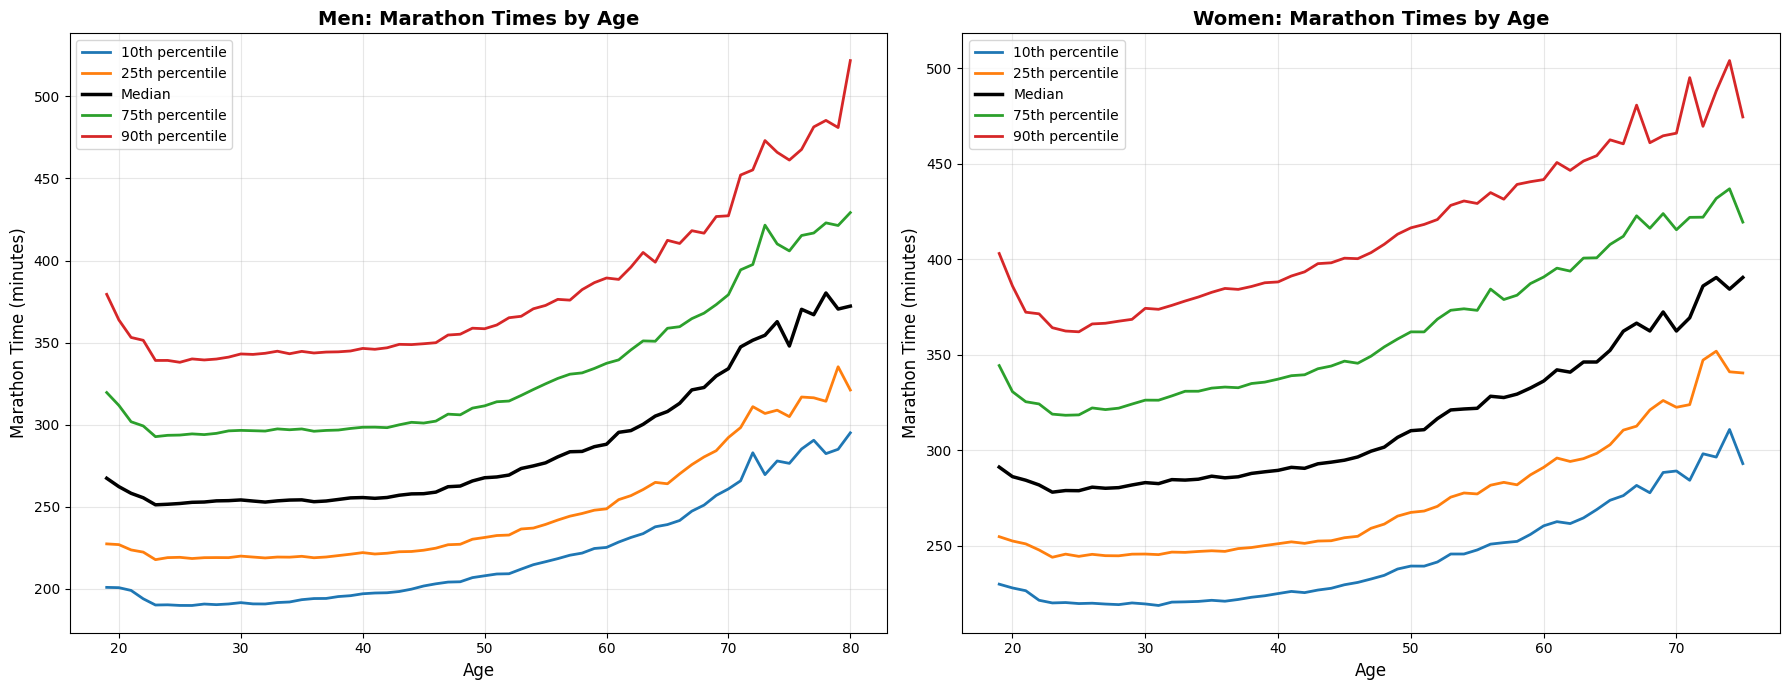


Sample counts by age and sex:
Men: 62 age groups
Women: 57 age groups


In [12]:
# Filter to M/F only and calculate percentiles by age and sex
df_valid_sex = df_valid[df_valid['sex'].isin(['M', 'F'])]

# Group by age and sex
age_sex_stats = df_valid_sex.groupby(['age', 'sex'])['time'].agg([
    ('count', 'count'),
    ('10th_percentile', lambda x: np.percentile(x, 10)),
    ('25th_percentile', lambda x: np.percentile(x, 25)),
    ('50th_percentile', lambda x: np.percentile(x, 50)),
    ('75th_percentile', lambda x: np.percentile(x, 75)),
    ('90th_percentile', lambda x: np.percentile(x, 90)),
    ('mean', 'mean')
]).reset_index()

# Filter to ages with sufficient data for each sex
age_sex_stats = age_sex_stats[age_sex_stats['count'] >= 50]

# Separate men and women
men_stats = age_sex_stats[age_sex_stats['sex'] == 'M']
women_stats = age_sex_stats[age_sex_stats['sex'] == 'F']

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Men
ax1.plot(men_stats['age'], men_stats['10th_percentile'], label='10th percentile', linewidth=2)
ax1.plot(men_stats['age'], men_stats['25th_percentile'], label='25th percentile', linewidth=2)
ax1.plot(men_stats['age'], men_stats['50th_percentile'], label='Median', linewidth=2.5, color='black')
ax1.plot(men_stats['age'], men_stats['75th_percentile'], label='75th percentile', linewidth=2)
ax1.plot(men_stats['age'], men_stats['90th_percentile'], label='90th percentile', linewidth=2)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Marathon Time (minutes)', fontsize=12)
ax1.set_title('Men: Marathon Times by Age', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Women
ax2.plot(women_stats['age'], women_stats['10th_percentile'], label='10th percentile', linewidth=2)
ax2.plot(women_stats['age'], women_stats['25th_percentile'], label='25th percentile', linewidth=2)
ax2.plot(women_stats['age'], women_stats['50th_percentile'], label='Median', linewidth=2.5, color='black')
ax2.plot(women_stats['age'], women_stats['75th_percentile'], label='75th percentile', linewidth=2)
ax2.plot(women_stats['age'], women_stats['90th_percentile'], label='90th percentile', linewidth=2)
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Marathon Time (minutes)', fontsize=12)
ax2.set_title('Women: Marathon Times by Age', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSample counts by age and sex:")
print("="*80)
print(f"Men: {len(men_stats)} age groups")
print(f"Women: {len(women_stats)} age groups")

## Create Age-Graded Percentile Lookup Table
This table can be used to normalize runner times based on their age and sex.

In [13]:
# Create a comprehensive lookup table with multiple percentiles
age_graded_lookup = age_sex_stats.copy()

# Rename columns for clarity
age_graded_lookup = age_graded_lookup.rename(columns={
    'count': 'sample_count',
    '10th_percentile': 'p10_time',
    '25th_percentile': 'p25_time',
    '50th_percentile': 'p50_time',
    '75th_percentile': 'p75_time',
    '90th_percentile': 'p90_time',
    'mean': 'mean_time'
})

# Save to CSV
output_path = "../data/age_graded_percentiles.csv"
age_graded_lookup.to_csv(output_path, index=False)
print(f"Saved age-graded percentile lookup table to {output_path}")
print(f"Total entries: {len(age_graded_lookup)}")

# Display sample
print("\nSample of lookup table:")
print("="*80)
display(age_graded_lookup.head(20))

Saved age-graded percentile lookup table to ../data/age_graded_percentiles.csv
Total entries: 119

Sample of lookup table:


,age,sex,sample_count,p10_time,p25_time,p50_time,p75_time,p90_time,mean_time
0,19.0,F,2328,229.825000,254.691667,291.116667,344.283333,402.971667,306.618807
1,19.0,M,3049,200.956667,227.450000,267.416667,319.633333,379.440000,280.950623
2,20.0,F,3960,227.848333,252.425000,286.125000,330.612500,385.950000,297.929596
3,20.0,M,4279,200.783333,227.000000,262.300000,311.783333,363.826667,275.349396
4,21.0,F,5949,226.393333,250.916667,284.250000,325.350000,372.230000,293.748582
5,21.0,M,5686,199.091667,223.770833,258.258333,301.833333,353.183333,269.796524
6,22.0,F,9091,221.400000,247.733333,281.783333,324.191667,371.383333,290.574669
7,22.0,M,7829,193.996667,222.433333,255.533333,299.266667,351.436667,266.500609
8,23.0,F,17136,220.000000,243.916667,278.000000,318.854167,364.116667,286.516892
9,23.0,M,12599,190.216667,217.841667,251.250000,292.766667,339.166667,260.075297


## Usage Example: Calculate Age-Graded Percentile for Runners
Shows how to use the lookup table to normalize individual runner performances.

In [14]:
# Function to calculate age-graded percentile score
def calculate_age_graded_score(time, age, sex, lookup_table):
    """
    Calculate where a runner's time falls relative to their age/sex cohort.
    
    Returns a percentile-like score where:
    - 0 = at the 50th percentile (median) for their age/sex
    - Negative = faster than median
    - Positive = slower than median
    """
    # Find the matching row in the lookup table
    match = lookup_table[(lookup_table['age'] == age) & (lookup_table['sex'] == sex)]
    
    if len(match) == 0:
        return None  # No data for this age/sex combination
    
    row = match.iloc[0]
    
    # Calculate how many minutes faster/slower than median
    delta_from_median = time - row['p50_time']
    
    # Normalize by the spread (75th - 25th percentile)
    spread = row['p75_time'] - row['p25_time']
    if spread > 0:
        normalized_score = delta_from_median / spread
    else:
        normalized_score = 0
    
    return normalized_score

# Test on a few sample runners
sample_runners = race_df[
    (race_df['age'].notna()) & 
    (race_df['time'].notna()) & 
    (race_df['sex'].isin(['M', 'F']))
].sample(10)

print("Sample Age-Graded Scores:")
print("="*80)
print(f"{'Age':<5} {'Sex':<5} {'Time (min)':<12} {'AG Score':<12} {'Interpretation'}")
print("-"*80)

for _, runner in sample_runners.iterrows():
    score = calculate_age_graded_score(
        runner['time'], 
        int(runner['age']), 
        runner['sex'], 
        age_graded_lookup
    )
    
    if score is not None:
        if score < -1:
            interpretation = "Excellent (top 25%)"
        elif score < 0:
            interpretation = "Above average"
        elif score < 1:
            interpretation = "Below average"
        else:
            interpretation = "Needs improvement"
        
        print(f"{int(runner['age']):<5} {runner['sex']:<5} {runner['time']:<12.1f} {score:<12.2f} {interpretation}")

print("\n" + "="*80)
print("AG Score interpretation:")
print("  < -1.0  : Top 25% for age/sex group")
print("  -1 to 0 : Above median for age/sex group")
print("   0 to 1 : Below median for age/sex group")
print("  > 1.0   : Bottom 25% for age/sex group")

Sample Age-Graded Scores:
Age   Sex   Time (min)   AG Score     Interpretation
--------------------------------------------------------------------------------
44    F     272.7        -0.23        Above average
47    M     204.8        -0.72        Above average
31    F     288.1        0.07         Below average
25    M     190.8        -0.82        Above average
43    M     269.8        0.16         Below average
28    M     428.0        2.30         Needs improvement
41    F     380.2        1.03         Needs improvement
46    M     278.4        0.25         Below average
28    F     229.4        -0.66        Above average
43    M     278.5        0.28         Below average

AG Score interpretation:
  < -1.0  : Top 25% for age/sex group
  -1 to 0 : Above median for age/sex group
   0 to 1 : Below median for age/sex group
  > 1.0   : Bottom 25% for age/sex group


## Smooth Fitted Functions for 10th Percentile
Fit polynomial functions to the 10th percentile data to create smooth curves, especially important for older ages where data is sparse.

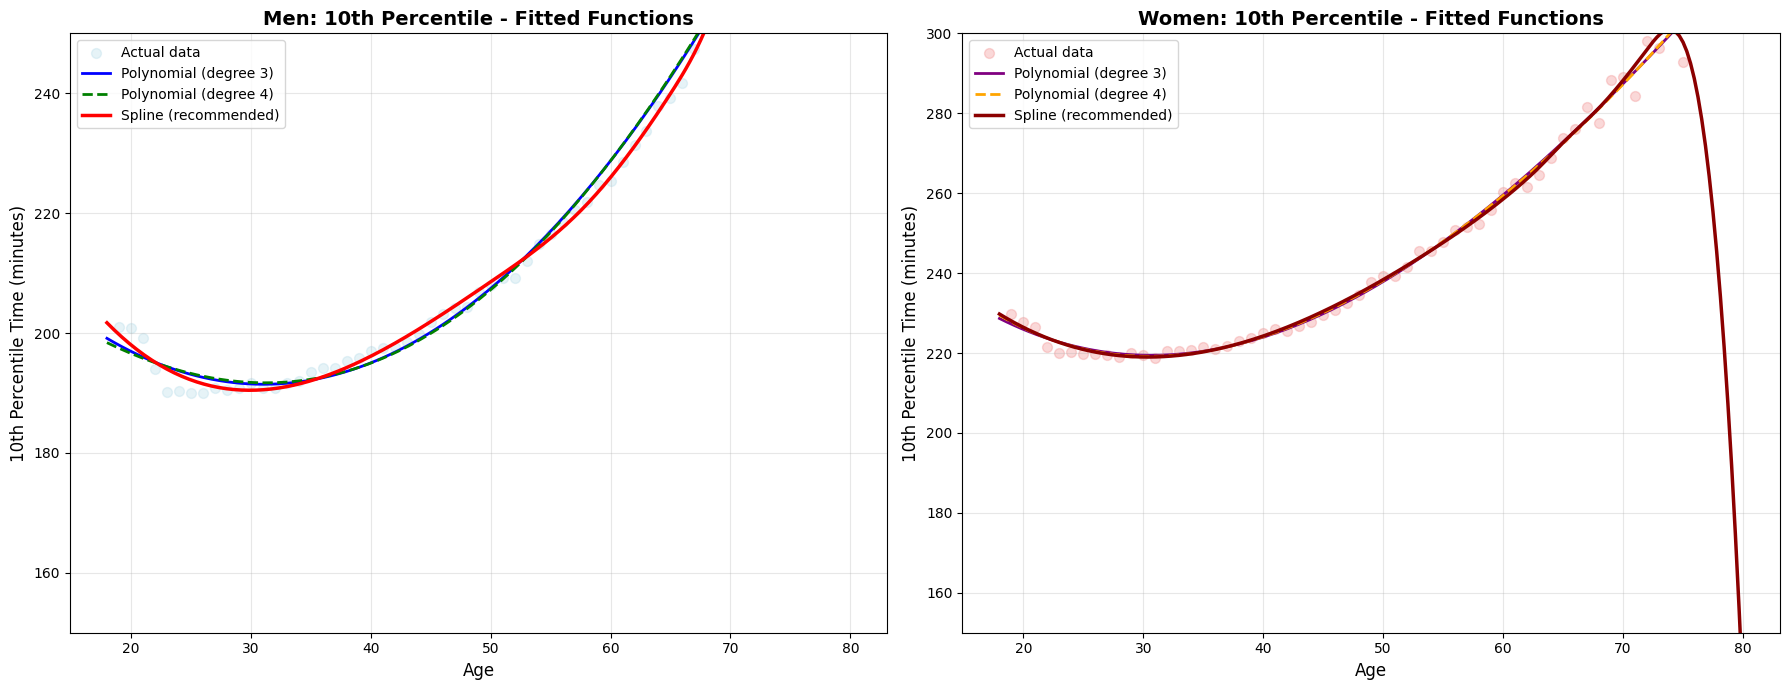

Fitted function models created successfully!
The spline method provides the smoothest fit and handles older ages best.


In [17]:
from scipy.interpolate import UnivariateSpline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Prepare data for fitting - use correct column name '10th_percentile'
men_fit_data = men_stats[['age', '10th_percentile']].dropna()
women_fit_data = women_stats[['age', '10th_percentile']].dropna()

# Method 1: Polynomial regression (degree 3)
def fit_polynomial(age_data, time_data, degree=3):
    """Fit a polynomial of given degree to the data."""
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(age_data.reshape(-1, 1), time_data)
    return model

# Method 2: Spline fitting (smoother)
def fit_spline(age_data, time_data, smoothing=200):
    """Fit a smoothing spline to the data."""
    spline = UnivariateSpline(age_data, time_data, s=smoothing)
    return spline

# Fit for men
men_poly3 = fit_polynomial(men_fit_data['age'].values, men_fit_data['10th_percentile'].values, degree=3)
men_poly4 = fit_polynomial(men_fit_data['age'].values, men_fit_data['10th_percentile'].values, degree=4)
men_spline = fit_spline(men_fit_data['age'].values, men_fit_data['10th_percentile'].values, smoothing=300)

# Fit for women
women_poly3 = fit_polynomial(women_fit_data['age'].values, women_fit_data['10th_percentile'].values, degree=3)
women_poly4 = fit_polynomial(women_fit_data['age'].values, women_fit_data['10th_percentile'].values, degree=4)
women_spline = fit_spline(women_fit_data['age'].values, women_fit_data['10th_percentile'].values, smoothing=300)

# Generate smooth curves
age_range = np.linspace(18, 80, 200)

men_poly3_pred = men_poly3.predict(age_range.reshape(-1, 1))
men_poly4_pred = men_poly4.predict(age_range.reshape(-1, 1))
men_spline_pred = men_spline(age_range)

women_poly3_pred = women_poly3.predict(age_range.reshape(-1, 1))
women_poly4_pred = women_poly4.predict(age_range.reshape(-1, 1))
women_spline_pred = women_spline(age_range)

# Plot comparisons
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Men
ax1.scatter(men_fit_data['age'], men_fit_data['10th_percentile'], alpha=0.3, s=50, label='Actual data', color='lightblue')
ax1.plot(age_range, men_poly3_pred, linewidth=2, label='Polynomial (degree 3)', color='blue')
ax1.plot(age_range, men_poly4_pred, linewidth=2, label='Polynomial (degree 4)', color='green', linestyle='--')
ax1.plot(age_range, men_spline_pred, linewidth=2.5, label='Spline (recommended)', color='red')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('10th Percentile Time (minutes)', fontsize=12)
ax1.set_title('Men: 10th Percentile - Fitted Functions', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(150, 250)

# Women
ax2.scatter(women_fit_data['age'], women_fit_data['10th_percentile'], alpha=0.3, s=50, label='Actual data', color='lightcoral')
ax2.plot(age_range, women_poly3_pred, linewidth=2, label='Polynomial (degree 3)', color='purple')
ax2.plot(age_range, women_poly4_pred, linewidth=2, label='Polynomial (degree 4)', color='orange', linestyle='--')
ax2.plot(age_range, women_spline_pred, linewidth=2.5, label='Spline (recommended)', color='darkred')
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('10th Percentile Time (minutes)', fontsize=12)
ax2.set_title('Women: 10th Percentile - Fitted Functions', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(150, 300)

plt.tight_layout()
plt.show()

print("Fitted function models created successfully!")
print("="*80)
print("The spline method provides the smoothest fit and handles older ages best.")

## Create Smoothed Lookup Table
Generate a lookup table using the fitted spline functions for each age from 18-80.

In [18]:
# Create smoothed lookup table for integer ages
ages_int = np.arange(18, 81)

# Generate smooth predictions
smoothed_data = []

for age in ages_int:
    # Men's predicted time
    men_p10_smooth = men_spline(age)
    
    # Women's predicted time
    women_p10_smooth = women_spline(age)
    
    smoothed_data.append({
        'age': age,
        'sex': 'M',
        'p10_time_smooth': float(men_p10_smooth)
    })
    
    smoothed_data.append({
        'age': age,
        'sex': 'F',
        'p10_time_smooth': float(women_p10_smooth)
    })

smoothed_df = pd.DataFrame(smoothed_data)

# Merge with original data to compare
merged_comparison = age_graded_lookup.merge(
    smoothed_df, 
    on=['age', 'sex'], 
    how='outer'
)

# Save smoothed lookup
smoothed_output_path = "../data/age_graded_p10_smoothed.csv"
smoothed_df.to_csv(smoothed_output_path, index=False)
print(f"Saved smoothed 10th percentile lookup table to {smoothed_output_path}")

# Display comparison
print("\nComparison of actual vs smoothed 10th percentile:")
print("="*80)

comparison_sample = merged_comparison[
    (merged_comparison['age'].isin([20, 30, 40, 50, 60, 70, 75, 80])) & 
    (merged_comparison['sex'].isin(['M', 'F']))
][['age', 'sex', 'p10_time', 'p10_time_smooth']].sort_values(['sex', 'age'])

comparison_sample['difference'] = comparison_sample['p10_time'] - comparison_sample['p10_time_smooth']
display(comparison_sample)

print("\nNote: Smoothed values are particularly useful for ages 70+ where actual data is sparse.")

Saved smoothed 10th percentile lookup table to ../data/age_graded_p10_smoothed.csv

Comparison of actual vs smoothed 10th percentile:


,age,sex,p10_time,p10_time_smooth,difference
4,20.0,F,227.848333,226.414865,1.433468
24,30.0,F,219.473333,219.001184,0.472149
44,40.0,F,224.900000,224.251513,0.648487
64,50.0,F,239.306667,238.349205,0.957462
84,60.0,F,260.360000,258.506452,1.853548
104,70.0,F,289.083333,288.185412,0.897921
114,75.0,F,292.943333,297.862628,-4.919294
124,80.0,F,NaN,135.619043,NaN
5,20.0,M,200.783333,198.033137,2.750196
25,30.0,M,191.663333,190.453548,1.209785



Note: Smoothed values are particularly useful for ages 70+ where actual data is sparse.


## Function to Predict Smoothed 10th Percentile
Helper functions to predict expected 10th percentile time for any age/sex.

In [ ]:
def predict_p10_time(age, sex):
    """
    Predict the smoothed 10th percentile marathon time for a given age and sex.
    
    Parameters:
    -----------
    age : float or int
        Age of the runner (18-80)
    sex : str
        Sex of the runner ('M' or 'F')
    
    Returns:
    --------
    float : Predicted 10th percentile time in minutes
    """
    if age < 18 or age > 80:
        raise ValueError("Age must be between 18 and 80")
    
    if sex == 'M':
        return float(men_spline(age))
    elif sex == 'F':
        return float(women_spline(age))
    else:
        raise ValueError("Sex must be 'M' or 'F'")

# Test the function
print("Example predictions for 10th percentile times:")
print("="*80)
print(f"{'Age':<5} {'Sex':<5} {'Predicted P10 Time (min)':<30} {'Time (H:MM:SS)'}")
print("-"*80)

test_ages = [25, 35, 45, 55, 65, 75]
for age in test_ages:
    for sex in ['M', 'F']:
        p10_time = predict_p10_time(age, sex)
        hours = int(p10_time // 60)
        mins = int(p10_time % 60)
        secs = int((p10_time % 1) * 60)
        print(f"{age:<5} {sex:<5} {p10_time:<30.2f} {hours}:{mins:02d}:{secs:02d}")

print("\n" + "="*80)
print("These smoothed values provide consistent predictions across all ages,")
print("especially useful for ages 70+ where raw data may be noisy or sparse.")

## Percentile Distribution: Men's Finish Times
Compare percentile distributions (1%, 5%, 10%, 50%) for men across all-time data and past 3 years.

In [27]:
# Filter for men only
men_df = race_df[
    (race_df['sex'] == 'M') & 
    (race_df['time'].notna()) & 
    (race_df['age'].notna()) &
    (race_df['age'] > 18) &
    (race_df['age'] < 100)
]
men_df['year'] = men_df.date.apply(lambda x:int(x.split('-')[0]))

# Check if year column exists
if 'year' in men_df.columns:
    # Determine past 3 years cutoff
    max_year = men_df['year'].max()
    past_3_years_cutoff = max_year - 2  # Past 3 years inclusive
    
    # Filter for past 3 years
    men_past_3_years = men_df[men_df['year'] >= past_3_years_cutoff]
    
    print(f"Data range: {men_df['year'].min():.0f} - {max_year:.0f}")
    print(f"Past 3 years: {past_3_years_cutoff:.0f} - {max_year:.0f}")
    print(f"All-time sample size: {len(men_df):,}")
    print(f"Past 3 years sample size: {len(men_past_3_years):,}")
else:
    # If no year column, just use all data
    men_past_3_years = men_df
    print("No year column found - using all data for both comparisons")

print("\n" + "="*80)

# Calculate percentiles for all-time
all_time_percentiles = {
    '1%': np.percentile(men_df['time'], 1),
    '5%': np.percentile(men_df['time'], 5),
    '10%': np.percentile(men_df['time'], 10),
    '50%': np.percentile(men_df['time'], 50),
}

# Calculate percentiles for past 3 years
past_3_years_percentiles = {
    '1%': np.percentile(men_past_3_years['time'], 1),
    '5%': np.percentile(men_past_3_years['time'], 5),
    '10%': np.percentile(men_past_3_years['time'], 10),
    '50%': np.percentile(men_past_3_years['time'], 50),
}

# Create comparison table
comparison_data = []
for percentile in ['1%', '5%', '10%', '50%']:
    all_time_minutes = all_time_percentiles[percentile]
    past_3_minutes = past_3_years_percentiles[percentile]
    diff_minutes = past_3_minutes - all_time_minutes
    
    # Convert to H:MM:SS format
    def minutes_to_hms(mins):
        hours = int(mins // 60)
        minutes = int(mins % 60)
        seconds = int((mins % 1) * 60)
        return f"{hours}:{minutes:02d}:{seconds:02d}"
    
    comparison_data.append({
        'Percentile': percentile,
        'All-Time (min)': round(all_time_minutes, 2),
        'All-Time (H:MM:SS)': minutes_to_hms(all_time_minutes),
        'Past 3 Years (min)': round(past_3_minutes, 2),
        'Past 3 Years (H:MM:SS)': minutes_to_hms(past_3_minutes),
        'Difference (min)': round(diff_minutes, 2)
    })

comparison_df = pd.DataFrame(comparison_data)

print("\nMen's Finish Time Percentiles: All-Time vs Past 3 Years")
print("="*80)
display(comparison_df)

print("\nNotes:")
print("- 1% = Top 1% fastest times")
print("- 50% = Median time")
print("- Positive difference = Past 3 years are slower than all-time average")

Data range: 2000 - 2023
Past 3 years: 2021 - 2023
All-time sample size: 749,967
Past 3 years sample size: 76,771


Men's Finish Time Percentiles: All-Time vs Past 3 Years


,Percentile,All-Time (min),All-Time (H:MM:SS),Past 3 Years (min),Past 3 Years (H:MM:SS),Difference (min)
0,1%,164.27,2:44:16,155.89,2:35:53,-8.38
1,5%,184.87,3:04:52,175.98,2:55:58,-8.89
2,10%,198.27,3:18:16,188.23,3:08:13,-10.03
3,50%,259.72,4:19:42,253.88,4:13:52,-5.83



Notes:
- 1% = Top 1% fastest times
- 50% = Median time
- Positive difference = Past 3 years are slower than all-time average


## Percentile Distribution: Men Ages 40-45
Same analysis filtered to men in the 40-45 age bracket.

In [28]:
# Filter for men ages 40-45
men_40_45_df = race_df[
    (race_df['sex'] == 'M') & 
    (race_df['time'].notna()) & 
    (race_df['age'].notna()) &
    (race_df['age'] >= 40) &
    (race_df['age'] <= 45)
]

men_40_45_df['year'] = men_40_45_df.date.apply(lambda x:int(x.split('-')[0]))

# Check if year column exists
if 'year' in men_40_45_df.columns:
    # Determine past 3 years cutoff
    max_year = men_40_45_df['year'].max()
    past_3_years_cutoff = max_year - 2  # Past 3 years inclusive
    
    # Filter for past 3 years
    men_40_45_past_3_years = men_40_45_df[men_40_45_df['year'] >= past_3_years_cutoff]
    
    print(f"Data range: {men_40_45_df['year'].min():.0f} - {max_year:.0f}")
    print(f"Past 3 years: {past_3_years_cutoff:.0f} - {max_year:.0f}")
    print(f"All-time sample size (ages 40-45): {len(men_40_45_df):,}")
    print(f"Past 3 years sample size (ages 40-45): {len(men_40_45_past_3_years):,}")
else:
    # If no year column, just use all data
    men_40_45_past_3_years = men_40_45_df
    print("No year column found - using all data for both comparisons")

print("\n" + "="*80)

# Calculate percentiles for all-time (ages 40-45)
all_time_40_45_percentiles = {
    '1%': np.percentile(men_40_45_df['time'], 1),
    '5%': np.percentile(men_40_45_df['time'], 5),
    '10%': np.percentile(men_40_45_df['time'], 10),
    '50%': np.percentile(men_40_45_df['time'], 50),
}

# Calculate percentiles for past 3 years (ages 40-45)
past_3_years_40_45_percentiles = {
    '1%': np.percentile(men_40_45_past_3_years['time'], 1),
    '5%': np.percentile(men_40_45_past_3_years['time'], 5),
    '10%': np.percentile(men_40_45_past_3_years['time'], 10),
    '50%': np.percentile(men_40_45_past_3_years['time'], 50),
}

# Create comparison table
comparison_40_45_data = []
for percentile in ['1%', '5%', '10%', '50%']:
    all_time_minutes = all_time_40_45_percentiles[percentile]
    past_3_minutes = past_3_years_40_45_percentiles[percentile]
    diff_minutes = past_3_minutes - all_time_minutes
    
    # Convert to H:MM:SS format
    def minutes_to_hms(mins):
        hours = int(mins // 60)
        minutes = int(mins % 60)
        seconds = int((mins % 1) * 60)
        return f"{hours}:{minutes:02d}:{seconds:02d}"
    
    comparison_40_45_data.append({
        'Percentile': percentile,
        'All-Time (min)': round(all_time_minutes, 2),
        'All-Time (H:MM:SS)': minutes_to_hms(all_time_minutes),
        'Past 3 Years (min)': round(past_3_minutes, 2),
        'Past 3 Years (H:MM:SS)': minutes_to_hms(past_3_minutes),
        'Difference (min)': round(diff_minutes, 2)
    })

comparison_40_45_df = pd.DataFrame(comparison_40_45_data)

print("\nMen Ages 40-45 Finish Time Percentiles: All-Time vs Past 3 Years")
print("="*80)
display(comparison_40_45_df)

print("\nNotes:")
print("- Age range: 40-45 years old")
print("- 1% = Top 1% fastest times for this age group")
print("- 50% = Median time for this age group")
print("- Positive difference = Past 3 years are slower than all-time average")

Data range: 2000 - 2023
Past 3 years: 2021 - 2023
All-time sample size (ages 40-45): 120,085
Past 3 years sample size (ages 40-45): 10,326


Men Ages 40-45 Finish Time Percentiles: All-Time vs Past 3 Years


,Percentile,All-Time (min),All-Time (H:MM:SS),Past 3 Years (min),Past 3 Years (H:MM:SS),Difference (min)
0,1%,170.06,2:50:03,163.25,2:43:15,-6.81
1,5%,187.70,3:07:41,178.88,2:58:52,-8.82
2,10%,198.60,3:18:35,188.81,3:08:48,-9.79
3,50%,256.52,4:16:30,253.13,4:13:07,-3.38



Notes:
- Age range: 40-45 years old
- 1% = Top 1% fastest times for this age group
- 50% = Median time for this age group
- Positive difference = Past 3 years are slower than all-time average
